In [1]:
from SLGCA_Model import SLGCA
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import numpy as np
import warnings
from preprecess import *
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/luxin1/miniconda3/envs/pytorch/lib/R'

In [2]:
file_fold = '/home/luxin1/stDCL-Data/stDCL/osmFISH_mouse_brain_cortex/osmFISH_cortex.h5ad'
adata = sc.read_h5ad('/home/luxin1/stDCL-Data/stDCL/osmFISH_mouse_brain_cortex/osmFISH_cortex.h5ad')
adata.var_names_make_unique()

adata=adata[adata.obs["Region"] != "Excluded"]

In [3]:
adata

View of AnnData object with n_obs × n_vars = 4839 × 33
    obs: 'ClusterName', 'ClusterID', 'Region'
    uns: 'ClusterName_colors'
    obsm: 'spatial'

In [3]:
model = SLGCA(adata = adata,device=device, epochs=500,dim_output=64, n_top_genes=3000, n_neighbors=4,alpha=10,beta=0.6,gama=0.7)
adata = model.train()
from utils import clustering

tool = 'mclust'
radius = 50
clustering(adata, n_clusters=11, method=tool, radius=radius, refinement=True)
ARI = metrics.adjusted_rand_score(adata.obs['SLGCA'], adata.obs['Region'])
NMI = metrics.normalized_mutual_info_score(adata.obs['SLGCA'], adata.obs['Region'])
print(ARI,NMI)

Begin to train ST data...


100%|██████████| 500/500 [00:47<00:00, 10.49it/s]


Optimization finished for ST data!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
0.588435297082934 0.707383269324651


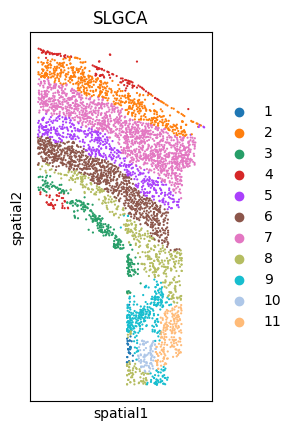

In [4]:
import matplotlib.pyplot as plt
sc.pl.embedding(adata,basis='spatial',color=['SLGCA'],show=False,size=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()